In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [391]:
training_set = pd.read_csv("Google_Stock_Price_Train.csv")


In [392]:
training_set.head()



,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [393]:
training_set.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [394]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


<AxesSubplot:>

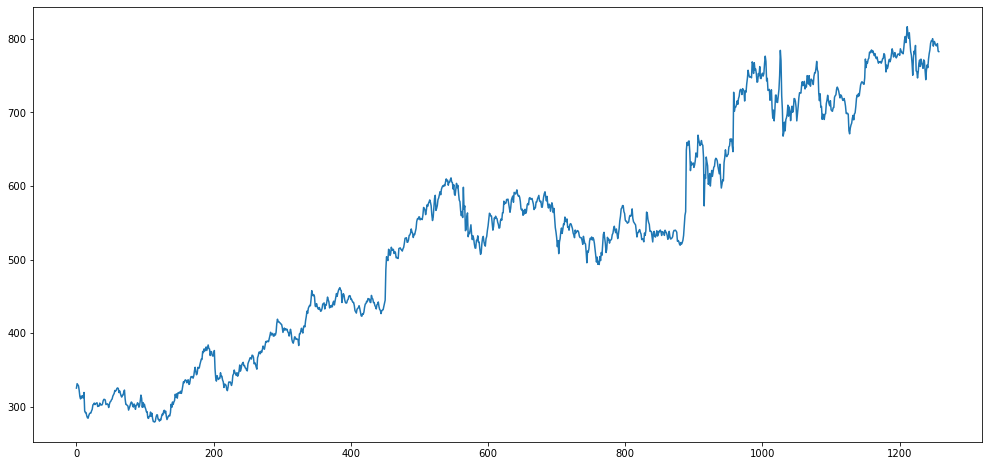

In [395]:
training_set['Open'].plot(figsize=(17,8))

In [396]:
training_set=training_set.replace('[^\d.]','',regex=True).astype(float)

In [397]:
training_set["Close"]=training_set["Close"].astype(float)

In [398]:
training_set["Volume"]=training_set["Volume"].astype(float)

In [399]:
training_set.rolling(7).mean().head(20)

,Date,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,4.277263e+05,323.002857,325.392857,318.682857,643.132857,7.208100e+06
7,5.691549e+05,321.457143,322.882857,316.841429,638.037143,6.691514e+06
8,7.105834e+05,318.698571,319.801429,314.025714,631.870000,6.531857e+06
9,8.562977e+05,316.552857,317.524286,311.851429,627.534286,6.137929e+06


<AxesSubplot:>

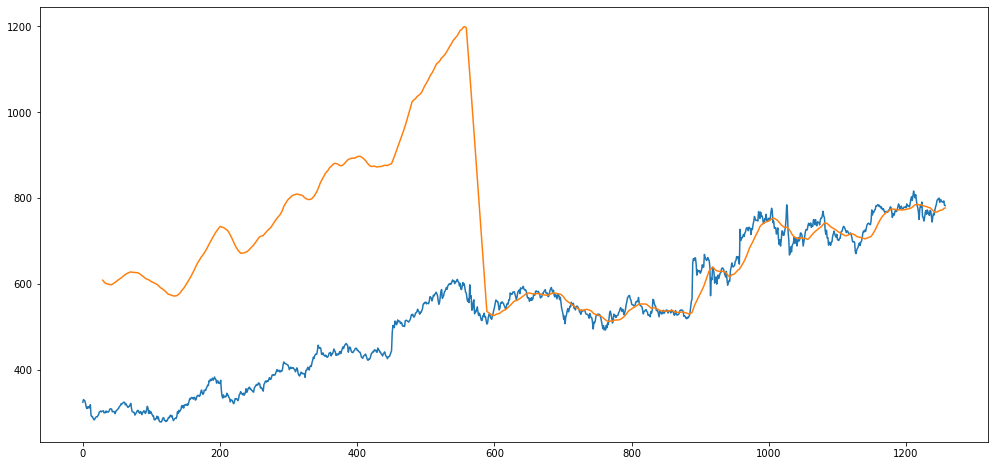

In [400]:
training_set['Open'].plot(figsize=(17,8))
training_set.rolling(window=30).mean()['Close'].plot()

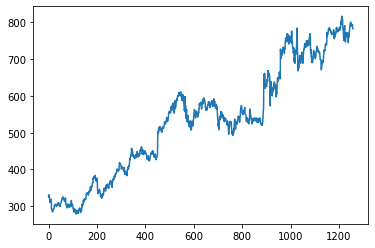

In [706]:
plt.plot(training_set.Open)

In [712]:
train_set=pd.DataFrame(training_set['Open'][0:int(len(training_set)*0.70)])
test_set=pd.DataFrame(training_set['Open'][int(len(training_set)*0.70):int(len(training_set))])


In [714]:
print(train_set.shape)
print(test_set.shape)


(880, 1)
(378, 1)


In [713]:
training_set.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

# DATA PREPROCESSING 

In [722]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()




In [723]:
train_set_array = sc.fit_transform(train_set)

In [724]:
train_set_array.shape

(880, 1)

In [725]:

X_train=[]
Y_train=[]
for i in range (60,train_set_array.shape[0]):
    X_train.append(train_set_array[i-60:i])
    Y_train.append(train_set_array[i,0])
X_train,Y_train=np.array( X_train),np.array( Y_train)




    
    

In [726]:
X_train.shape

(820, 60, 1)

# Feature Extraction


In [547]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [756]:
model = Sequential()

In [757]:
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
model.add(Dense(units = 1))


In [758]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 4)                 96        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [759]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Trainign set
model.fit(X_train, Y_train, batch_size = 32, epochs = 200)


Epoch 1/200
26/26 [==============================] - 4s 24ms/step - loss: 0.1362
Epoch 2/200
26/26 [==============================] - 1s 23ms/step - loss: 0.1255
Epoch 3/200
26/26 [==============================] - 1s 36ms/step - loss: 0.1141
Epoch 4/200
26/26 [==============================] - 1s 32ms/step - loss: 0.1033
Epoch 5/200
26/26 [==============================] - 1s 26ms/step - loss: 0.0929
Epoch 6/200
26/26 [==============================] - 1s 26ms/step - loss: 0.0846
Epoch 7/200
26/26 [==============================] - 1s 27ms/step - loss: 0.0785
Epoch 8/200
26/26 [==============================] - 1s 25ms/step - loss: 0.0745
Epoch 9/200
26/26 [==============================] - 1s 23ms/step - loss: 0.0721
Epoch 10/200
26/26 [==============================] - 1s 29ms/step - loss: 0.0703
Epoch 11/200
26/26 [==============================] - 1s 27ms/step - loss: 0.0688
Epoch 12/200
26/26 [==============================] - 1s 22ms/step - loss: 0.0674
Epoch 13/200
26/26 [=====

# VISUALIZATION


In [729]:
test_set.head()


,Open
880,519.50
881,523.13
882,521.05
883,523.12
884,526.29


In [731]:
last_60_days=train_set.tail(60)

In [733]:
final_val=last_60_days.append(test_set,ignore_index=True)

In [734]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 880 to 1257
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    378 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [735]:
final_val.head()

,Open
0,539.55
1,540.81
2,536.94
3,534.78
4,527.25


In [738]:
input=sc.fit_transform(final_val)

In [740]:
input

array([[0.06746753],
       [0.07170738],
       [0.05868497],
       [0.05141665],
       [0.02607847],
       [0.03011643],
       [0.02594387],
       [0.01568073],
       [0.0556565 ],
       [0.04522512],
       [0.06736658],
       [0.15159163],
       [0.14768827],
       [0.11824483],
       [0.10421293],
       [0.09546403],
       [0.06369877],
       [0.06403526],
       [0.06295848],
       [0.03950468],
       [0.01510869],
       [0.05770913],
       [0.06349687],
       [0.04071606],
       [0.0372165 ],
       [0.04801804],
       [0.06622249],
       [0.0420957 ],
       [0.04872468],
       [0.06390067],
       [0.06208359],
       [0.06948651],
       [0.06265563],
       [0.04475402],
       [0.06228548],
       [0.06013191],
       [0.05818023],
       [0.04519147],
       [0.06867892],
       [0.06144424],
       [0.05669964],
       [0.04647015],
       [0.02712161],
       [0.03317854],
       [0.06366512],
       [0.04071606],
       [0.02860219],
       [0.029

In [685]:
#test_set=test_set.replace('[^\d.]','',regex=True).astype(float)

In [686]:
#test_set["Volume"]=test_set["Volume"].astype(float)

In [687]:
#testing_set=test_set['Open']
#testing_set=pd.DataFrame(test_set)

In [782]:
x_test=[]
y_test=[]
for i in range(60,input.shape[0]):
    x_test.append(input[i-60:i])
    y_test.append(input[i,0])


In [783]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [784]:
print(x_test.shape)
print(y_test.shape)


(378, 60, 1)
(378,)


In [785]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     float64
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


# Predictions

In [786]:
y_predict=model.predict(x_test)

12/12 [==============================] - 0s 8ms/step


In [787]:
y_predict.shape

(378, 4)

In [788]:
y_test

array([0.        , 0.01221482, 0.00521569, 0.01218117, 0.02284811,
       0.04502322, 0.09172892, 0.13671849, 0.15350966, 0.43576284,
       0.47022007, 0.45665926, 0.47577226, 0.47705095, 0.42903291,
       0.34154385, 0.38135137, 0.36779056, 0.37182852, 0.37647217,
       0.35614779, 0.36651188, 0.38639882, 0.42230298, 0.4062521 ,
       0.40372838, 0.50373511, 0.48314153, 0.47048927, 0.45598627,
       0.46200956, 0.47917087, 0.46133656, 0.4575005 , 0.40473787,
       0.18002557, 0.32105121, 0.30570698, 0.40345918, 0.38131772,
       0.36355071, 0.27882092, 0.28968975, 0.32808399, 0.2708796 ,
       0.312908  , 0.34228414, 0.31496063, 0.33733764, 0.35735918,
       0.36072414, 0.39023487, 0.39804159, 0.39467663, 0.38663436,
       0.36173363, 0.34507706, 0.3268726 , 0.37105458, 0.30567333,
       0.2617269 , 0.28191668, 0.29904435, 0.29510734, 0.37855845,
       0.4015748 , 0.43657043, 0.41005451, 0.40547816, 0.41251094,
       0.4160778 , 0.44992934, 0.45480853, 0.48660744, 0.47674

In [789]:
y_predict

array([[0.12546329, 0.14939463, 0.14134464, 0.1115748 ],
       [0.12360006, 0.14751993, 0.13933428, 0.10959896],
       [0.12542173, 0.14819814, 0.14096795, 0.11146051],
       ...,
       [0.8508278 , 0.8664913 , 0.8704485 , 0.84424937],
       [0.85324097, 0.8679802 , 0.87264   , 0.8470682 ],
       [0.84516174, 0.8654176 , 0.868052  , 0.8376399 ]], dtype=float32)

In [790]:
sc.scale_

array([0.00336496])

In [791]:
factor=1/0.00336496
y_predict=y_predict*factor
y_test=y_test*factor

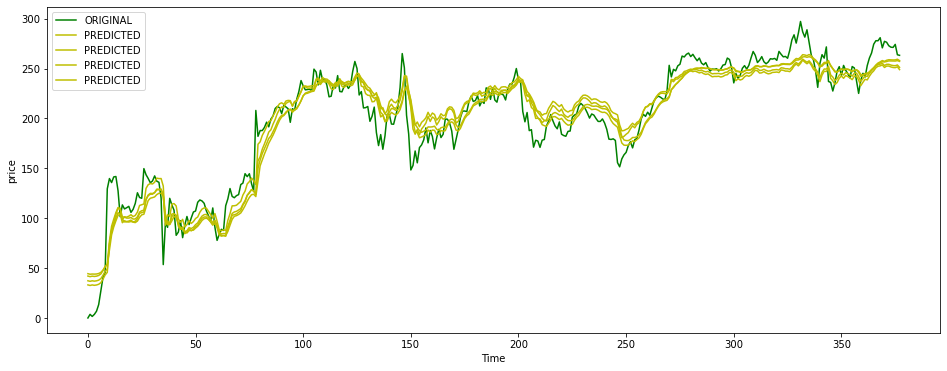

In [798]:
plt.figure(figsize=(16,6))
plt.plot(y_test,'g',label='ORIGINAL') 
plt.plot(y_predict,'y',label='PREDICTED')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# from the above plot we can observe we get the trend right which can prove to be very useful

In [799]:
model.save('model stock.h2')

INFO:tensorflow:Assets written to: model stock.h2\assets
